In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sklearn
from sklearn import linear_model

dataset = pd.read_csv('winequality-red.csv')
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [13]:
dataset.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

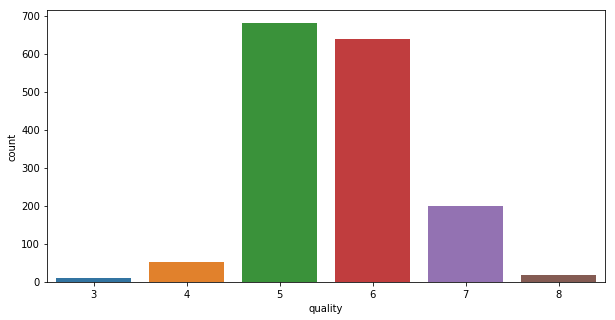

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(x='quality',data=dataset)
plt.xlabel=('Quality')
plt.ylabel=('Count')


In [41]:
#Use oversampling method to balance the count of quality
from imblearn.over_sampling import RandomOverSampler
x = dataset.iloc[:,:-1].values #icloc方法根据位置悬着，即选择所有行，所有列去掉右数第一列
y= dataset['quality'].values
ros = RandomOverSampler()#构造采样方法
x,y = ros.fit_sample(x,y)
print(pd.DataFrame(y)[0].value_counts().sort_index())


3    681
4    681
5    681
6    681
7    681
8    681
Name: 0, dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x100fac208>,
      dtype=object)

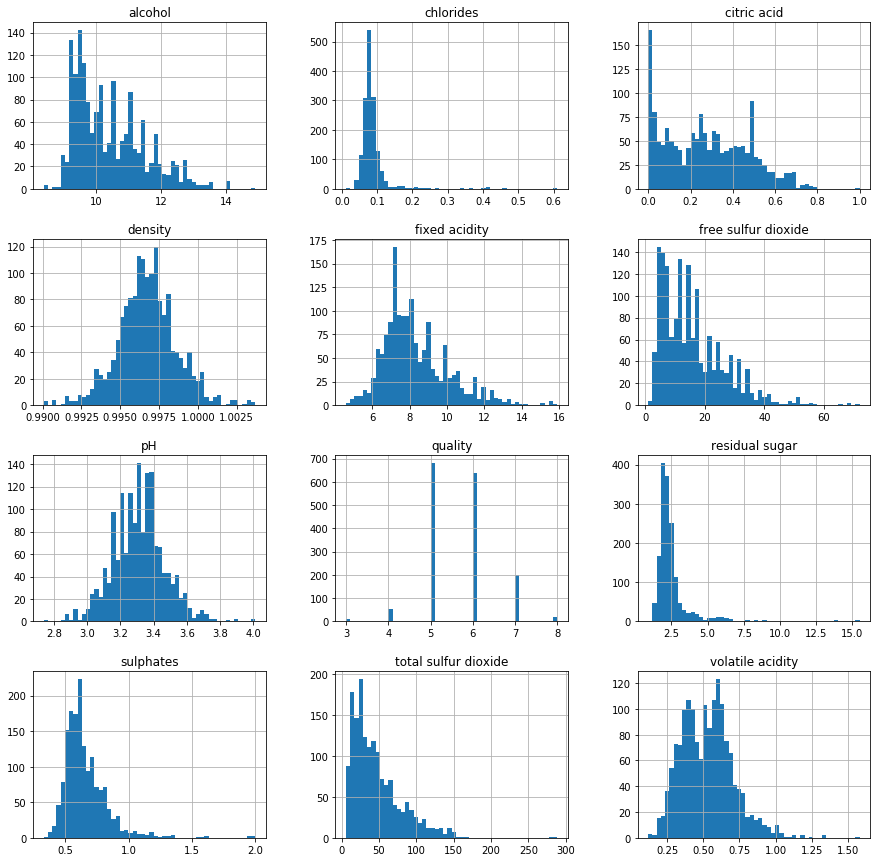

In [42]:
dataset.hist(bins=50,figsize=(15,15))

In [ ]:
According to the graphs, most of the distributions are skewed to the right. Density and pH show a normal distribution.

In [18]:
#First, try the logistic Regression Model to predict the quality using cross_val_score
from imblearn.over_sampling import RandomOverSampler
import sklearn
from sklearn import linear_model
x = dataset.iloc[:,:-1].values #icloc方法根据位置悬着，即选择所有行，所有列去掉右数第一列
y= dataset['quality'].values
ros = RandomOverSampler()#构造采样方法
x,y = ros.fit_sample(x,y)
lm=linear_model.LogisticRegression()
features=dataset.columns.values.tolist()
features=features[:-1]
features


['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [60]:
from sklearn.model_selection import cross_val_score
lm=linear_model.LogisticRegression()
scores=cross_val_score(lm,x,y,cv=5,scoring='accuracy')

print(np.mean(scores))

/Users/zhaiwenqi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/zhaiwenqi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/zhaiwenqi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/zhaiwenqi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/zhaiwenqi/anaconda3/lib/python3.7/site-packages/skl

0.519301917847431


/Users/zhaiwenqi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/zhaiwenqi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


This ~50% accuracy is probably due to curse of dimensionality or overfitting. So I will first plot the heat map to explore their interrelationship and try to fix this problem with PCA and categorization.

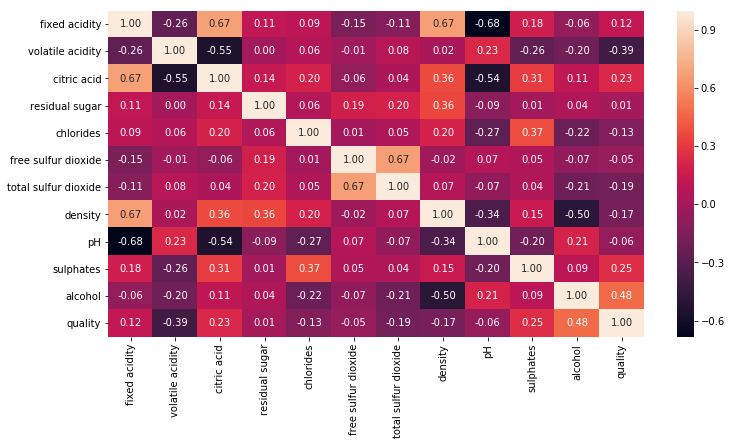

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))
data=dataset.corr()
sns.heatmap(data,annot=True,fmt='.2f')

3    681
4    681
5    681
6    681
7    681
8    681
Name: 0, dtype: int64
[3 7 3 4 7 7 3 5 4 7 6 5 6 6 7 4 3 6 6 7 6 8 8 8 8 3 6 6 3 8 8 3 6 3 7 4 5
 8 7 6 7 3 8 7 4 6 7 7 7 7 5 7 4 7 4 3 8 3 4 8 3 6 3 8 3 6 6 6 4 8 4 4 6 3
 3 3 4 6 6 5 3 5 8 3 5 5 6 8 5 8 6 4 7 8 4 6 5 6 5 4 5 7 3 8 7 3 4 3 3 7 6
 3 4 7 4 3 4 3 7 5 6 7 4 3 7 6 4 7 8 7 7 6 3 3 8 3 7 6 4 8 4 3 6 3 5 7 6 7
 3 4 4 6 5 4 7 7 3 8 4 3 6 3 7 8 4 8 8 6 5 3 3 8 7 7 7 8 7 7 4 7 4 3 8 7 7
 5 7 7 6 7 3 5 3 4 5 4 4 6 7 7 6 4 5 7 3 4 8 4 7 3 3 3 8 4 3 3 5 6 4 4 4 8
 6 4 4 4 7 3 6 4 7 7 5 7 4 4 5 8 6 7 3 7 8 8 6 7 7 3 8 8 8 8 4 8 7 4 7 4 7
 3 4 8 5 5 4 4 6 4 8 5 7 7 8 6 3 8 4 5 6 5 6 4 6 3 3 5 7 5 4 4 6 5 4 7 5 8
 8 5 6 4 8 4 5 7 8 7 6 7 7 3 8 7 4 7 7 5 8 5 6 5 6 7 6 3 8 6 8 7 6 3 3 4 4
 3 4 6 4 5 4 8 7 6 6 5 7 4 8 4 8 7 7 5 8 6 4 5 8 3 7 4 8 4 5 6 6 5 4 4 4 4
 6 8 4 7 6 4 8 3 4 5 8 3 7 6 3 8 7 3 4 5 6 4 5 5 5 8 4 3 6 5 7 4 7 3 3 7 8
 8 7 8 7 6 3 5 6 4 5 3 3 7 6 5 8 5 6 6 5 8 6 8 8 8 7 8 6 6 4 8 7 4 4 4 7 5
 8 4 6 4 7 8 5 5 7 6 7 4

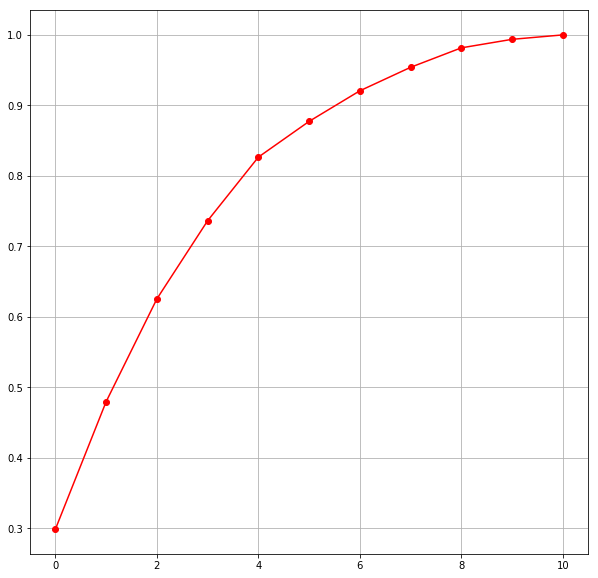

In [61]:
# Splitting the dataset into the Training set and Test set
from sklearn import linear_model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sklearn
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
from sklearn import metrics
from sklearn.model_selection import train_test_split



dataset = pd.read_csv('winequality-red.csv')


x = dataset.iloc[:,:-1].values #icloc方法根据位置悬着，即选择所有行，所有列去掉右数第一列
y= dataset['quality'].values

from imblearn.over_sampling import RandomOverSampler
x = dataset.iloc[:,:-1].values #icloc方法根据位置悬着，即选择所有行，所有列去掉右数第一列
y= dataset['quality'].values
ros = RandomOverSampler()#构造采样方法
x,y = ros.fit_sample(x,y)
print(pd.DataFrame(y)[0].value_counts().sort_index())


sc_x=StandardScaler()
x = sc_x.fit_transform(x)

from sklearn.decomposition import PCA
pca=PCA()
x_pca = pca.fit_transform(x)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.grid()

pca_new = PCA(n_components=2)
x_new = pca_new.fit_transform(x)

X_train, X_test, y_train, y_test = train_test_split(x_new, y, test_size = 0.2, random_state = 1)

explained_variance = pca.explained_variance_ratio_

clf2 =ensemble.RandomForestClassifier(200)


clf2.fit(X_train, y_train)
result = clf2.predict(X_test)
print(result) 
print(y_test)


print(metrics.classification_report(y_test, result))  #准确率 召回率 F值


In [63]:
from sklearn import linear_model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sklearn
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
from sklearn import metrics
from sklearn.model_selection import train_test_split


#grouping 
dataset = pd.read_csv('winequality-red.csv')
reviews = []
for i in dataset['quality']:
    if i >= 1 and i <= 3:
        reviews.append('1')
    elif i >= 4 and i <= 7:
        reviews.append('2')
    elif i >= 8 and i <= 10:
        reviews.append('3')
dataset['Reviews'] = reviews

dataset.head()

x = dataset.iloc[:,:-1].values #icloc方法根据位置悬着，即选择所有行，所有列去掉右数第一列
y= dataset['quality'].values

from imblearn.over_sampling import RandomOverSampler
x = dataset.iloc[:,:-2].values #icloc方法根据位置悬着，即选择所有行，所有列去掉右数第一列
y= dataset['Reviews'].values
ros = RandomOverSampler()#构造采样方法
x,y = ros.fit_sample(x,y)
print(pd.DataFrame(y)[0].value_counts().sort_index())


#Standardization
sc_x=StandardScaler()
x = sc_x.fit_transform(x)

#Applying the PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 8)
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)
explained_variance = pca.explained_variance_ratio_

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)


#Predicting thr Test set results
y_pred = classifier.predict(X_test)


print(y_pred) 
print(metrics.classification_report(y_test, y_pred )) 







1    1571
2    1571
3    1571
Name: 0, dtype: int64
['3' '3' '3' '3' '1' '3' '3' '1' '3' '3' '1' '3' '1' '3' '3' '1' '3' '1'
 '3' '2' '1' '1' '2' '1' '2' '3' '3' '1' '2' '1' '3' '2' '2' '2' '3' '1'
 '2' '3' '1' '1' '1' '1' '3' '2' '3' '2' '1' '2' '2' '2' '3' '2' '3' '2'
 '2' '3' '3' '3' '3' '3' '3' '3' '2' '3' '1' '3' '2' '1' '2' '1' '2' '1'
 '2' '1' '1' '3' '3' '3' '3' '3' '1' '2' '1' '3' '3' '3' '1' '1' '2' '3'
 '3' '3' '1' '1' '2' '2' '3' '3' '1' '3' '3' '2' '2' '2' '1' '3' '3' '3'
 '3' '2' '1' '3' '1' '1' '3' '1' '1' '3' '2' '2' '2' '1' '3' '2' '2' '3'
 '2' '3' '1' '2' '2' '2' '3' '1' '3' '3' '1' '1' '3' '3' '1' '2' '3' '1'
 '3' '2' '3' '1' '3' '3' '1' '2' '3' '1' '2' '1' '3' '3' '3' '1' '3' '1'
 '3' '3' '2' '3' '2' '3' '2' '1' '3' '3' '3' '3' '3' '1' '3' '2' '1' '2'
 '2' '3' '3' '3' '1' '2' '2' '3' '1' '3' '3' '3' '3' '3' '3' '3' '3' '1'
 '2' '2' '3' '3' '3' '3' '3' '2' '1' '1' '2' '2' '3' '3' '3' '1' '3' '2'
 '2' '1' '1' '1' '2' '1' '2' '2' '3' '1' '3' '1' '2' '1' '2' '1' '3' '2'

/Users/zhaiwenqi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/zhaiwenqi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


But according to the heat map, this is not possible explanation, so I decided to change another model to increase its accuracy.

In [136]:
#Second, try the Random Forest Model to see its performance using cross_val_score
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
rf=ensemble.RandomForestClassifier(200,random_state=42)
score=cross_val_score(rf,x,y,cv=10,scoring="accuracy")
print(np.mean(score))

0.8688512361466325


Compared the Logistic Regression Model and the Random Forest Model, we roughly have an idea that its socre is higher, but further exploration of the application of the model is still necessary.

In [129]:
#Data preparation -- Making sure that the data is chosen randomly
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(x, y):
    strat_train_set = dataset.loc[train_index]
    strat_test_set = dataset.loc[test_index]
strat_train_set['quality'].value_counts()/len(strat_train_set), strat_test_set['quality'].value_counts()/len(strat_test_set)

/Users/zhaiwenqi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """
/Users/zhaiwenqi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  


(5.0    0.166769
 6.0    0.155753
 7.0    0.048960
 4.0    0.012240
 8.0    0.003978
 3.0    0.002448
 Name: quality, dtype: float64, 5.0    0.166259
 6.0    0.157702
 7.0    0.047677
 4.0    0.015892
 8.0    0.006112
 3.0    0.002445
 Name: quality, dtype: float64)

In [130]:
dataset['quality'].value_counts()/len(dataset)

5    0.425891
6    0.398999
7    0.124453
4    0.033146
8    0.011257
3    0.006254
Name: quality, dtype: float64

1    1571
2    1571
3    1571
Name: 0, dtype: int64
(3770, 11) (3770,)
(943, 11) (943,)


/Users/zhaiwenqi/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


['2' '1' '3' '3' '1' '2' '3' '1' '3' '2' '3' '2' '3' '3' '1' '1' '2' '2'
 '2' '2' '1' '3' '3' '1' '2' '1' '1' '2' '1' '3' '3' '3' '1' '1' '1' '1'
 '1' '3' '2' '1' '3' '3' '2' '1' '3' '2' '2' '2' '1' '2' '2' '2' '2' '3'
 '3' '3' '3' '2' '2' '3' '1' '3' '1' '1' '3' '3' '2' '1' '1' '3' '2' '2'
 '3' '3' '2' '2' '1' '2' '3' '3' '2' '3' '2' '1' '2' '3' '3' '3' '1' '3'
 '2' '3' '3' '3' '3' '1' '2' '3' '1' '3' '2' '1' '1' '3' '1' '2' '2' '3'
 '3' '3' '3' '1' '3' '3' '1' '1' '3' '3' '2' '1' '3' '1' '3' '3' '1' '3'
 '2' '1' '2' '2' '1' '3' '1' '2' '2' '3' '3' '3' '3' '2' '2' '3' '2' '1'
 '1' '1' '2' '3' '2' '1' '1' '2' '1' '2' '2' '2' '2' '3' '1' '2' '3' '1'
 '1' '1' '3' '2' '3' '1' '1' '3' '3' '2' '3' '2' '2' '1' '3' '1' '3' '2'
 '2' '1' '3' '3' '3' '2' '3' '3' '2' '3' '1' '3' '3' '2' '2' '2' '2' '2'
 '2' '2' '3' '2' '2' '1' '2' '2' '1' '2' '1' '1' '1' '2' '1' '3' '2' '3'
 '1' '2' '3' '1' '1' '1' '1' '1' '3' '1' '3' '3' '2' '2' '3' '3' '3' '2'
 '1' '1' '2' '3' '1' '1' '2' '3' '2' '3' '3' '1' '3

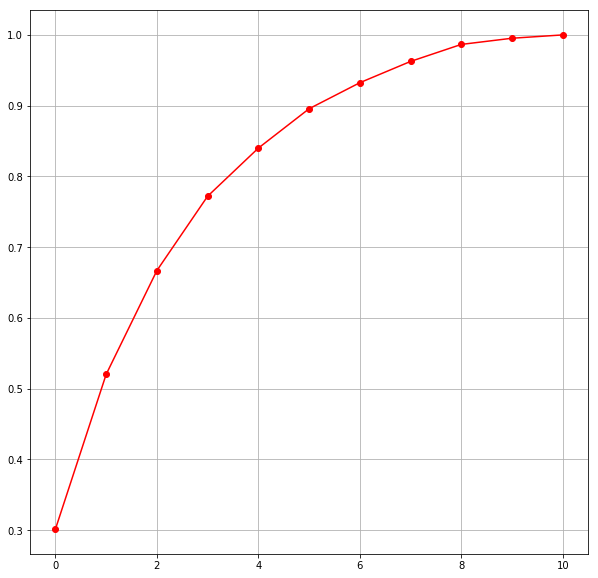

In [14]:
#Applying the SVM model to predict the quality
import os 
import numpy as np
from sklearn.svm import SVC  
from sklearn import metrics
from sklearn.model_selection import train_test_split



#grouping 
dataset = pd.read_csv('winequality-red.csv')
reviews = []
for i in dataset['quality']:
    if i >= 1 and i <= 3:
        reviews.append('1')
    elif i >= 4 and i <= 7:
        reviews.append('2')
    elif i >= 8 and i <= 10:
        reviews.append('3')
dataset['Reviews'] = reviews

dataset.head()

x = dataset.iloc[:,:-1].values #icloc方法根据位置悬着，即选择所有行，所有列去掉右数第一列
y= dataset['quality'].values

from imblearn.over_sampling import RandomOverSampler
x = dataset.iloc[:,:-2].values #icloc方法根据位置悬着，即选择所有行，所有列去掉右数第一列
y= dataset['Reviews'].values

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()#构造采样方法
x,y = ros.fit_sample(x,y)
print(pd.DataFrame(y)[0].value_counts().sort_index())


#Standardization
sc_x=StandardScaler()
x = sc_x.fit_transform(x)

from sklearn.decomposition import PCA
pca=PCA()
x_pca = pca.fit_transform(x)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.grid()

pca_new = PCA(n_components=2)
x_new = pca_new.fit_transform(x)

train_data, test_data, train_target, test_target = train_test_split(x, y, test_size=0.2, random_state=42)
print(train_data.shape, train_target.shape)
print (test_data.shape, test_target.shape)

clf1 = SVC()
clf1.fit(train_data, train_target)
result = clf1.predict(test_data)
print(result) 
print(test_target)

print (sum(result==test_target)) #预测结果与真实结果比对
print(metrics.classification_report(test_target, result))  #准确率 召回率 F值



In [125]:
#Applying the Random Forest Model to predict the quality
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

clf2 =ensemble.RandomForestClassifier(200)


clf2.fit(train_data, train_target)
result = clf2.predict(test_data)
print(result) 
print(test_target)

print (sum(result==test_target)) #预测结果与真实结果比对
print(metrics.classification_report(test_target, result))  #准确率 召回率 F值
scores=cross_val_score(lm,x,y,cv=5,scoring='accuracy')

[6 5 7 7 4 4 5 5 5 5 8 7 5 3 8 5 5 6 8 4 6 3 5 5 4 3 6 3 6 8 5 3 8 7 3 6 5
 8 6 7 8 8 5 7 7 6 7 6 4 8 5 6 5 6 6 3 4 7 4 6 5 4 6 3 8 4 3 7 7 6 4 3 5 7
 4 5 4 4 7 3 8 6 6 6 5 8 8 6 8 4 3 6 6 5 6 6 6 7 8 8 4 8 6 5 5 4 6 3 7 7 5
 4 7 5 5 4 3 8 4 5 5 6 7 5 6 7 5 7 5 3 7 7 5 3 4 3 8 6 5 3 7 5 5 6 7 8 7 6
 8 4 4 5 4 5 4 4 3 8 7 8 4 3 8 6 7 3 8 6 4 4 4 8 4 4 8 7 4 3 6 4 4 6 8 8 7
 7 5 7 6 7 7 6 6 7 5 4 4 3 4 8 7 8 3 4 3 7 4 5 4 5 8 7 6 6 8 7 4 6 7 3 5 3
 8 8 7 3 5 3 6 8 7 4 8 4 5 6 8 7 4 4 7 8 3 4 5 6 4 6 6 7 4 6 6 8 4 7 5 4 5
 5 4 7 3 6 6 3 7 7 8 3 7 4 6 6 3 6 6 6 3 8 5 8 5 6 5 5 3 4 4 8 8 3 4 5 7 3
 3 5 7 4 5 8 4 7 4 4 5 3 6 5 8 5 7 4 3 5 5 4 4 7 3 7 6 4 8 5 4 8 6 8 5 3 8
 5 5 8 5 6 5 3 3 5 3 8 8 6 8 5 7 8 8 3 6 3 4 8 8 4 5 4 8 6 7 3 7 4 7 8 5 3
 4 5 8 7 7 4 6 3 5 8 7 7 3 3 6 6 4 4 6 3 3 5 3 8 8 3 5 8 6 4 3 6 5 6 5 6 7
 5 4 6 5 3 7 8 5 4 3 4 5 3 3 8 3 7 5 5 3 5 7 6 5 5 7 7 7 6 7 8 4 3 4 7 7 4
 8 3 6 5 7 7 4 8 8 3 6 8 8 6 5 6 8 4 7 3 3 4 5 8 3 3 6 6 3 3 5 3 4 8 3 6 5
 4 8 8 5 6 3 7 6 4 4 4 5 

/Users/zhaiwenqi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/zhaiwenqi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/zhaiwenqi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/zhaiwenqi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/zhaiwenqi/anaconda3/lib/python3.7/site-packages/skl

I get the conclusion that the Random Forest model arrives at a 7% better accuracy compared with the SVM model

TBD: cross analysis between different columns
https://www.kaggle.com/shahp7575/red-wines-eda-classification/data#Training-model-using-Cross-Validation

In [ ]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn import metrics

from sklearn.metrics import roc_auc_score
dataset = pd.read_csv('winequality-red.csv')


x = dataset.iloc[:,:-1].values #icloc方法根据位置悬着，即选择所有行，所有列去掉右数第一列
y= dataset['quality'].values

#Use oversampling method to balance the count of quality
from imblearn.over_sampling import RandomOverSampler
x = dataset.iloc[:,:-1].values #icloc方法根据位置悬着，即选择所有行，所有列去掉右数第一列
y= dataset['quality'].values
ros = RandomOverSampler()#构造采样方法
x,y = ros.fit_sample(x,y)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
# Supervised transformation based on xgboost
xgb = xgb.XGBClassifier(nthread=4,     #含义：nthread=-1时，使用全部CPU进行并行运算（默认）, nthread=1时，使用1个CPU进行运算。
                          learning_rate=0.08,    #含义：学习率，控制每次迭代更新权重时的步长，默认0.3。调参：值越小，训练越慢。典型值为0.01-0.2。
                          n_estimators=50,       #含义：总共迭代的次数，即决策树的个数
                          max_depth=5,           #含义：树的深度，默认值为6，典型值3-10。调参：值越大，越容易过拟合；值越小，越容易欠拟合
                          gamma=0,               #含义：惩罚项系数，指定节点分裂所需的最小损失函数下降值。
                          subsample=0.9,       #含义：训练每棵树时，使用的数据占全部训练集的比例。默认值为1，典型值为0.5-1。调参：防止overfitting。
                          colsample_bytree=0.5) #训练每棵树时，使用的特征占全部特征的比例。默认值为1，典型值为0.5-1。调参：防止overfitting。
 
xgb_enc = OneHotEncoder()
xgb_lm = LogisticRegression(solver='lbfgs', max_iter=1000)
 
xgb.fit(X_train, y_train)
xgb_enc.fit(xgb.apply(X_train))
xgb_lm.fit(xgb_enc.transform(xgb.apply(X_train)), y_train)

y_pred_xgb_lm = xgb_lm.predict_proba(
    xgb_enc.transform(xgb.apply(X_test)))[:, 1]
fpr_xgb_lm, tpr_xgb_lm, _ = c(y_test, y_pred_xgb_lm)
Next step: Predict which are those highly related attributes and which are not so important and see if the elimination of those unrelated can improve the performance of the two models
print("xgboost+LR的AUC为：", roc_auc_score(y_test, y_pred_xgb_lm))
#TBD